# Step 1: Import Essential Libarary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Read the dataset
df = pd.read_csv("GOOGL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


# Step 2: Convert 'Date' column to datetime format

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Set 'Date' as the index

In [4]:
df.set_index('Date', inplace=True)

In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094898
2004-08-27,54.104103,54.364365,52.897900,53.128128,53.128128,6211782
2004-08-30,52.692692,52.797798,51.056057,51.056057,51.056057,5196798
2004-08-31,51.201202,51.906906,51.131130,51.236237,51.236237,4917877


In [6]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-11,2669.770020,2675.909912,2592.629883,2597.409912,2597.409912,1572700
2022-03-14,2605.000000,2608.179932,2505.500000,2519.020020,2519.020020,1940600
2022-03-15,2539.520020,2597.090088,2514.409912,2583.959961,2583.959961,1546000
2022-03-16,2614.659912,2666.659912,2574.689941,2665.610107,2665.610107,1778800
2022-03-17,2662.979980,2681.610107,2643.699951,2676.780029,2676.780029,1413200
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [7]:
# shape of the dataset
df.shape

(4431, 6)

In [8]:
# Check Missing Values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# Check Statistical Summary
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [10]:
# Check Dtype and Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4431 entries, 2004-08-19 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4431 non-null   float64
 1   High       4431 non-null   float64
 2   Low        4431 non-null   float64
 3   Close      4431 non-null   float64
 4   Adj Close  4431 non-null   float64
 5   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 242.3 KB


Text(0.5, 1.0, 'Opening Price of Google Data')

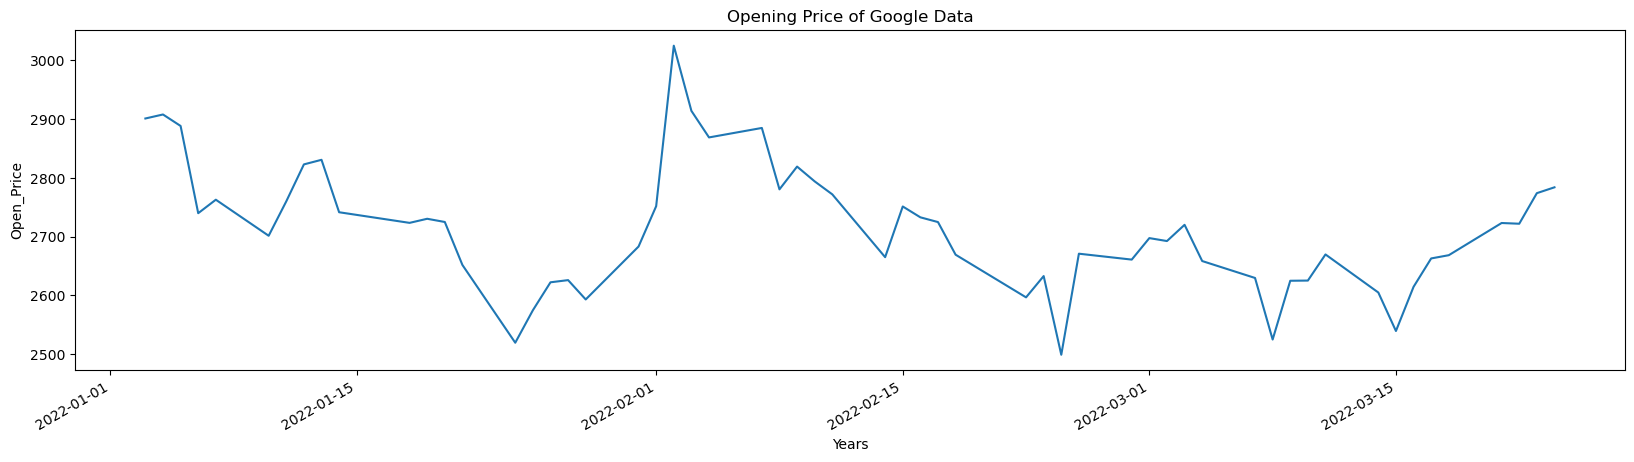

In [11]:
# Step 2: Filter last 2 years
df_2022 = df.loc['2022-01-01':]

plt.figure(figsize = (20,5))
df_2022['Open'].plot()
plt.xlabel("Years")
plt.ylabel("Open_Price")
plt.title("Opening Price of Google Data")

Text(0.5, 1.0, 'Closing Price of Google Data')

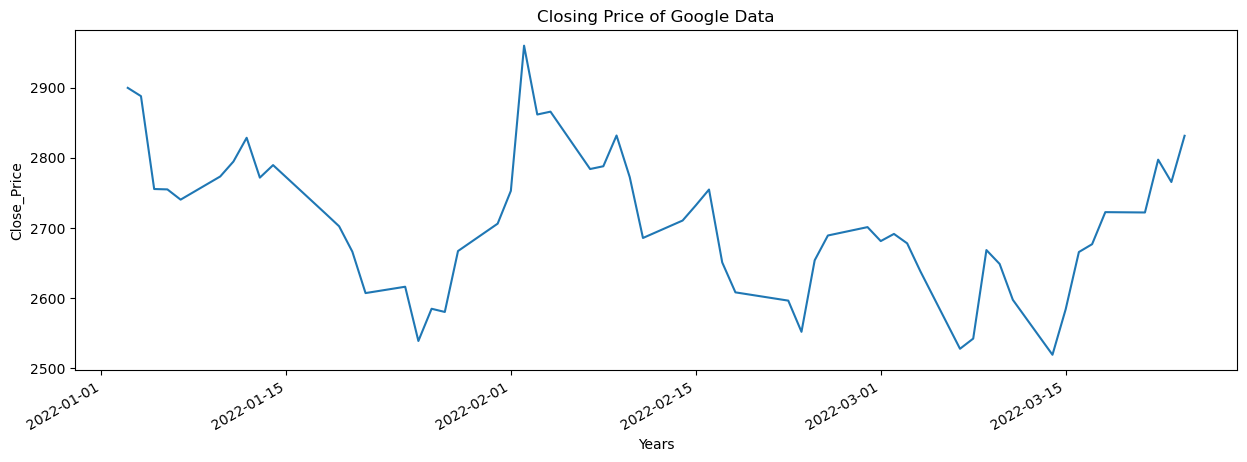

In [12]:
df_2022 = df.loc['2022-01-01':]

plt.figure(figsize = (15,5))
df_2022['Close'].plot()
plt.xlabel("Years")
plt.ylabel("Close_Price")
plt.title("Closing Price of Google Data")

# Step 4: Decomposition 

In [13]:
# Step 2: Decomposition of Close price
close_series = df['Close']
decomposition = seasonal_decompose(close_series, model='additive', period=365)

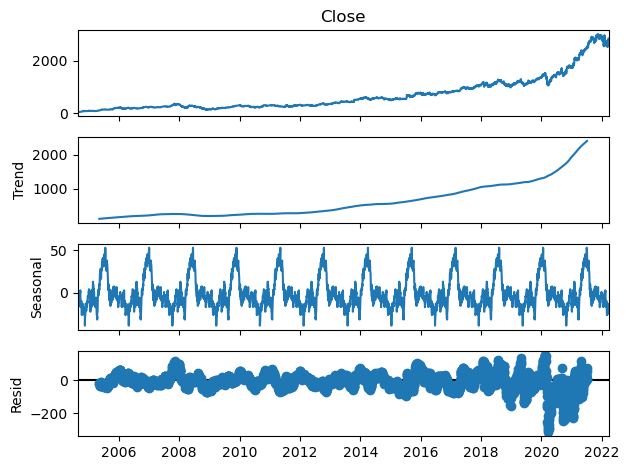

In [14]:
# Plot decomposition
fig = decomposition.plot()

# Step 5: ADF Test

In [15]:
# Check for stationarity Using ADF Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics",result[0])
    print("p Value:",result[1])
    if result[1] <= 0.5:
        print("Data is Statinarity")
    else:
        print("Data is not statinarity")

In [16]:
adf_test(df['Close'])

ADF Statistics 3.2009812703228016
p Value: 1.0
Data is not statinarity


In [17]:
# Differencing to remove trend and seasonality

df['Close_diff'] = df['Close'].diff()
df = df.dropna(subset=['Close_diff'])

In [18]:
df['Close_diff']

Date
2004-08-20     3.988990
2004-08-23     0.545544
2004-08-24    -2.267265
2004-08-25     0.565567
2004-08-26     0.955955
                ...    
2022-03-18    45.729981
2022-03-21    -0.479981
2022-03-22    75.330078
2022-03-23   -31.850097
2022-03-24    65.929931
Name: Close_diff, Length: 4430, dtype: float64

In [19]:
adf_test(df['Close'])

ADF Statistics 3.2024096351508105
p Value: 1.0
Data is not statinarity


# Step 6: ACF And PACF Plot

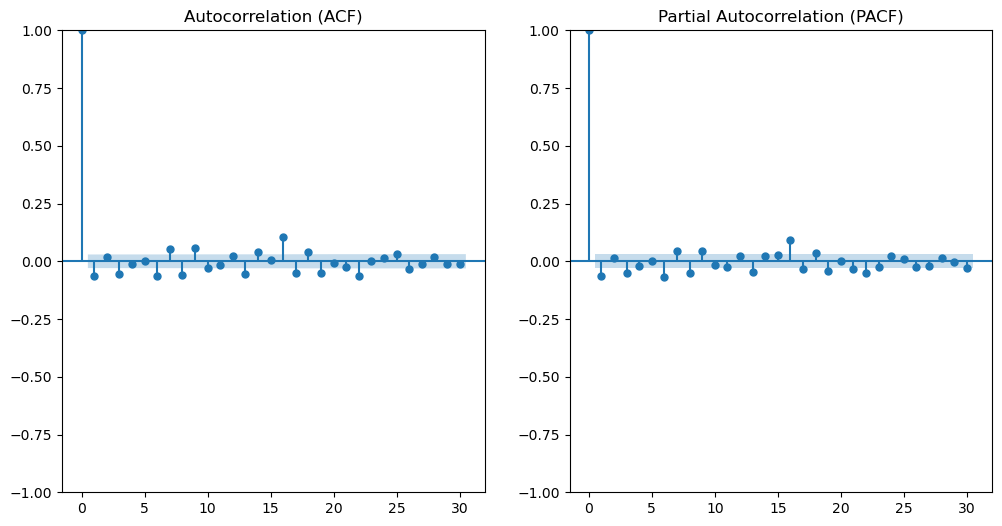

In [20]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df['Close_diff'], lags=30, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(df['Close_diff'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation (PACF)')

plt.show()

In [21]:
train_size = int(len(df)*0.8)
train,test = df.iloc[:train_size],df.iloc[train_size:]

In [22]:
print("Train size:", len(train))
print("Test size:", len(test))

Train size: 3544
Test size: 886


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

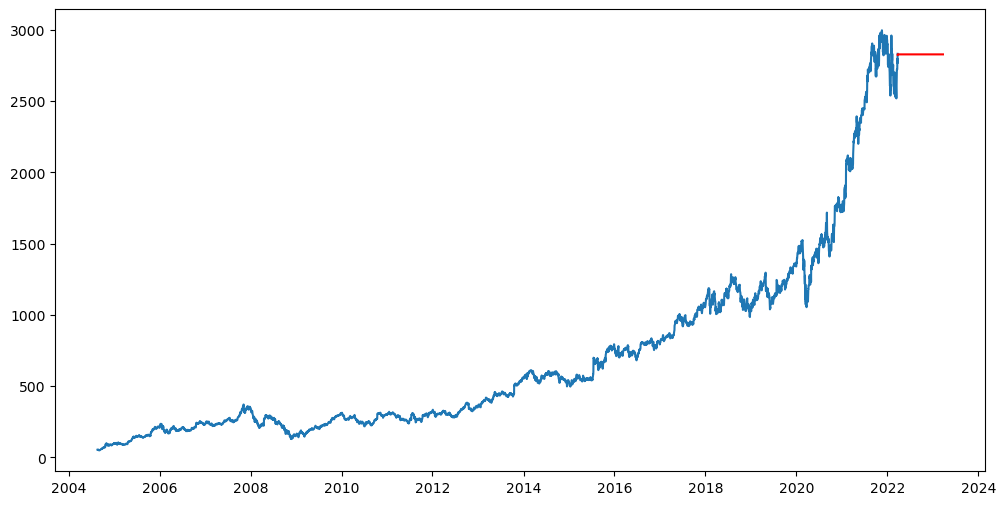

In [29]:
# Fit ARIMA model
model_arima = ARIMA(df['Close'], order=(1, 1, 1))   # (p,d,q)
result_arima = model_arima.fit()

# Forecast next 365 days
forecast = result_arima.forecast(steps=365)
forecast_index = pd.date_range(df.index[-1], periods=365, freq='D')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original')
plt.plot(forecast_index, forecast, label='Forecast (Next 365 Days)', color='red')
plt.show()

In [24]:
# Use only the 'Close' column for univariate ARIMA
series = df['Close']

# Split into train and test
train_size = int(len(series) * 0.8)
train = series[:train_size]
test = series[train_size:]

#  Predict future values
start_index = len(train)
end_index = start_index + len(test) - 1
predicted_values = result_arima.predict(start=start_index, end=end_index, typ='levels')

# Evaluate prediction using RMSE
rmse = np.sqrt(mean_squared_error(test, predicted_values))
print("Test RMSE:", round(rmse, 2))

Test RMSE: 32.4


In [25]:
# model_sarima = SARIMAX(df['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 365))
# result_sarima = model_sarima.fit()


# # Forecast next 30 days
# forecast = result_arima.forecast(steps=365)
# forecast_index = pd.date_range(df.index[-1], periods=365, freq='D')

# # Plot
# plt.figure(figsize=(12, 6))
# plt.plot(df['Close'], label='Original')
# plt.plot(forecast_index, forecast, label='Forecast (Next 30 Days)', color='red')
# plt.show()

In [26]:
# # Forecast karna
# pred_sarima = model_sarima_fit.predict(start=start, end=end, typ='levels')

# # RMSE calculate karna
# rmse_sarima = np.sqrt(mean_squared_error(test, pred_sarima))
# print(f'SARIMA RMSE: {rmse_sarima}')